In [1]:
import chess
import chess.polyglot
import chess.uci
import random

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

## Initialize engine and book

In [3]:
book = chess.polyglot.open_reader("data/polyglot/performance.bin")
engine = chess.uci.popen_engine("stockfish-8-win/Windows/stockfish_8_x64.exe")
engine.uci()
info_handler = chess.uci.InfoHandler()
engine.info_handlers.append(info_handler)

## Functions

In [4]:
def book_move(board):
    moves = [entry.move() for entry in book.find_all(board)]
    if len(moves) > 0:
        return random.choice(moves)
    else:
        return None

In [5]:
def random_move(board):
    moves = [move for move in board.legal_moves]
    return random.choice(moves)

In [6]:
def engine_move(board, time):
    engine.position(board)
    return engine.go(movetime=time)[0]

In [7]:
def get_eval(to_move):
    evaluation = info_handler.info["score"][1].cp
    if not evaluation:
        try:
            evaluation = 50 * (info_handler.info["score"][1].mate > 1)
            if to_move == "white":
                evaluation *= -1
        except:
            evaluation = 50
    else:
        evaluation = evaluation/100
    
    if evaluation == 0:
        evaluation = 50
        if to_move == "black":
                evaluation *= -1
    
    return evaluation

In [8]:
def game(time=1000):
    evaluations = []
    board = chess.Board()
    
    while True:
        engine.position(board)
        engine_move = engine.go(movetime=time)[0]
        
        to_move = "white"
        white = book_move(board)
        if not white:
            white = engine_move

        whitemove = board.san(white)
        board.push(white)                

        if board.is_game_over():
            evaluation = get_eval(to_move)
            evaluations.append(evaluation)        
            result = board.result()
            # print(result)
            return evaluations
        
        to_move = "black"

        black = random_move(board)
        evaluation = get_eval(to_move)
        evaluations.append(evaluation)                 
        # print(str(board.fullmove_number)+".", whitemove, board.san(black), evaluation)
        board.push(black)

        if board.is_game_over():
            evaluation = get_eval(to_move)
            evaluations.append(evaluation)
            result = board.result()
            # print(result)
            return evaluations

## Simulations

In [9]:
results = []
for i in range(1000):
    # print("Game", i+1)
    results.append(game(10))

## Results

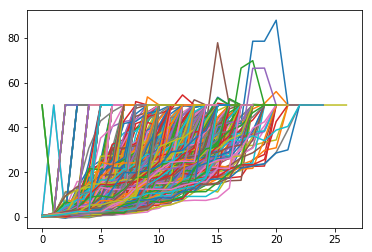

In [10]:
for result in results:
    plt.plot(result)
plt.show()

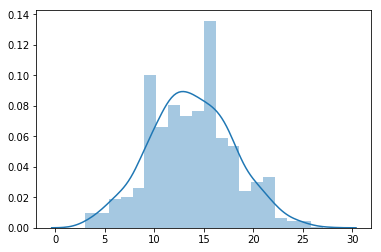

In [11]:
sb.distplot([len(result) for result in results])
plt.show()

In [13]:
print("Game lengths")
print("------------")
print("Mean:", np.mean([len(result) for result in results]))
print("Median:", np.median([len(result) for result in results]))
print("Min:", np.min([len(result) for result in results]))
print("Max:", np.max([len(result) for result in results]))

Game lengths
------------
Mean: 13.739
Median: 14.0
Min: 3
Max: 27
